In [1]:
import pandas as pd

# Load the cleaned dataset
drug_deaths = pd.read_csv('/Users/arka_bagchi/Desktop/Springboard/Data Storytelling/drug_deaths_cleaned.csv')

# Display the first few rows of the dataset to confirm it's loaded correctly
drug_deaths.head()


,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,1.0,42.0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,...,0,0,0,NaN,0,0.0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,Unknown,Unknown,NORWALK,...,0,0,0,NaN,0,0.0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,0,0,0,NaN,0,1.0,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,0,0,0,NaN,0,1.0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,Unknown,GREENWICH,...,0,0,0,NaN,0,0.0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


Here's a summary of how we'll approach EDA:

Data Cleaning and Preliminary Analysis:
Check for missing values and handle them accordingly.
Look for any duplicates or inconsistencies in the data.
Understand the data types and convert them if necessary.

Univariate Analysis:
Look at the distributions of individual variables, e.g., age, sex, race, etc.
Explore the distribution of death occurrences over time.
Bivariate and Multivariate Analysis:

Explore the relationships between different variables.
Look for any correlations between variables, especially between demographic variables and substances involved.

Geographic Analysis:
Analyze the geographic distribution of drug overdose deaths.
Explore if there are any geographic clusters or hotspots for drug overdoses.

Substance Analysis:
Explore the distribution of different substances involved in the overdoses.
Look for any trends or patterns in substance abuse over time.

Statistical Testing (if necessary):
Conduct statistical tests to identify significant relationships or differences between groups.

In [2]:
# Checking for missing values in each column
missing_values = drug_deaths.isnull().sum()

# Checking for duplicate rows
duplicate_rows = drug_deaths.duplicated().sum()

# Understanding data types
data_types = drug_deaths.dtypes

missing_values, duplicate_rows, data_types


(ID                        0
 Date                      2
 DateType                  2
 Age                       0
 Sex                       0
 Race                      0
 ResidenceCity             0
 ResidenceCounty           0
 ResidenceState            0
 DeathCity                 5
 DeathCounty            1100
 Location                 24
 LocationifOther        4515
 DescriptionofInjury       0
 InjuryPlace              66
 InjuryCity                0
 InjuryCounty              0
 InjuryState               0
 COD                       0
 OtherSignifican           0
 Heroin                    0
 Cocaine                   0
 Fentanyl                  4
 Fentanyl_Analogue         0
 Oxycodone                 0
 Oxymorphone               0
 Ethanol                   0
 Hydrocodone               0
 Benzodiazepine            0
 Methadone                 0
 Amphet                    0
 Tramad                    0
 Morphine_NotHeroin        0
 Hydromorphone             0
 Other        

In [3]:
# Converting the 'Date' column to datetime data type
drug_deaths['Date'] = pd.to_datetime(drug_deaths['Date'], errors='coerce')

# Extracting year and month for further analysis
drug_deaths['Year'] = drug_deaths['Date'].dt.year
drug_deaths['Month'] = drug_deaths['Date'].dt.month

# Checking the time frame of the data by looking at the minimum and maximum dates
time_frame = (drug_deaths['Date'].min(), drug_deaths['Date'].max())
time_frame


/var/folders/xp/7gn92qw92_z23w6s9k9sxtfm0000gq/T/ipykernel_59453/3833638656.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drug_deaths['Date'] = pd.to_datetime(drug_deaths['Date'], errors='coerce')


(Timestamp('2012-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

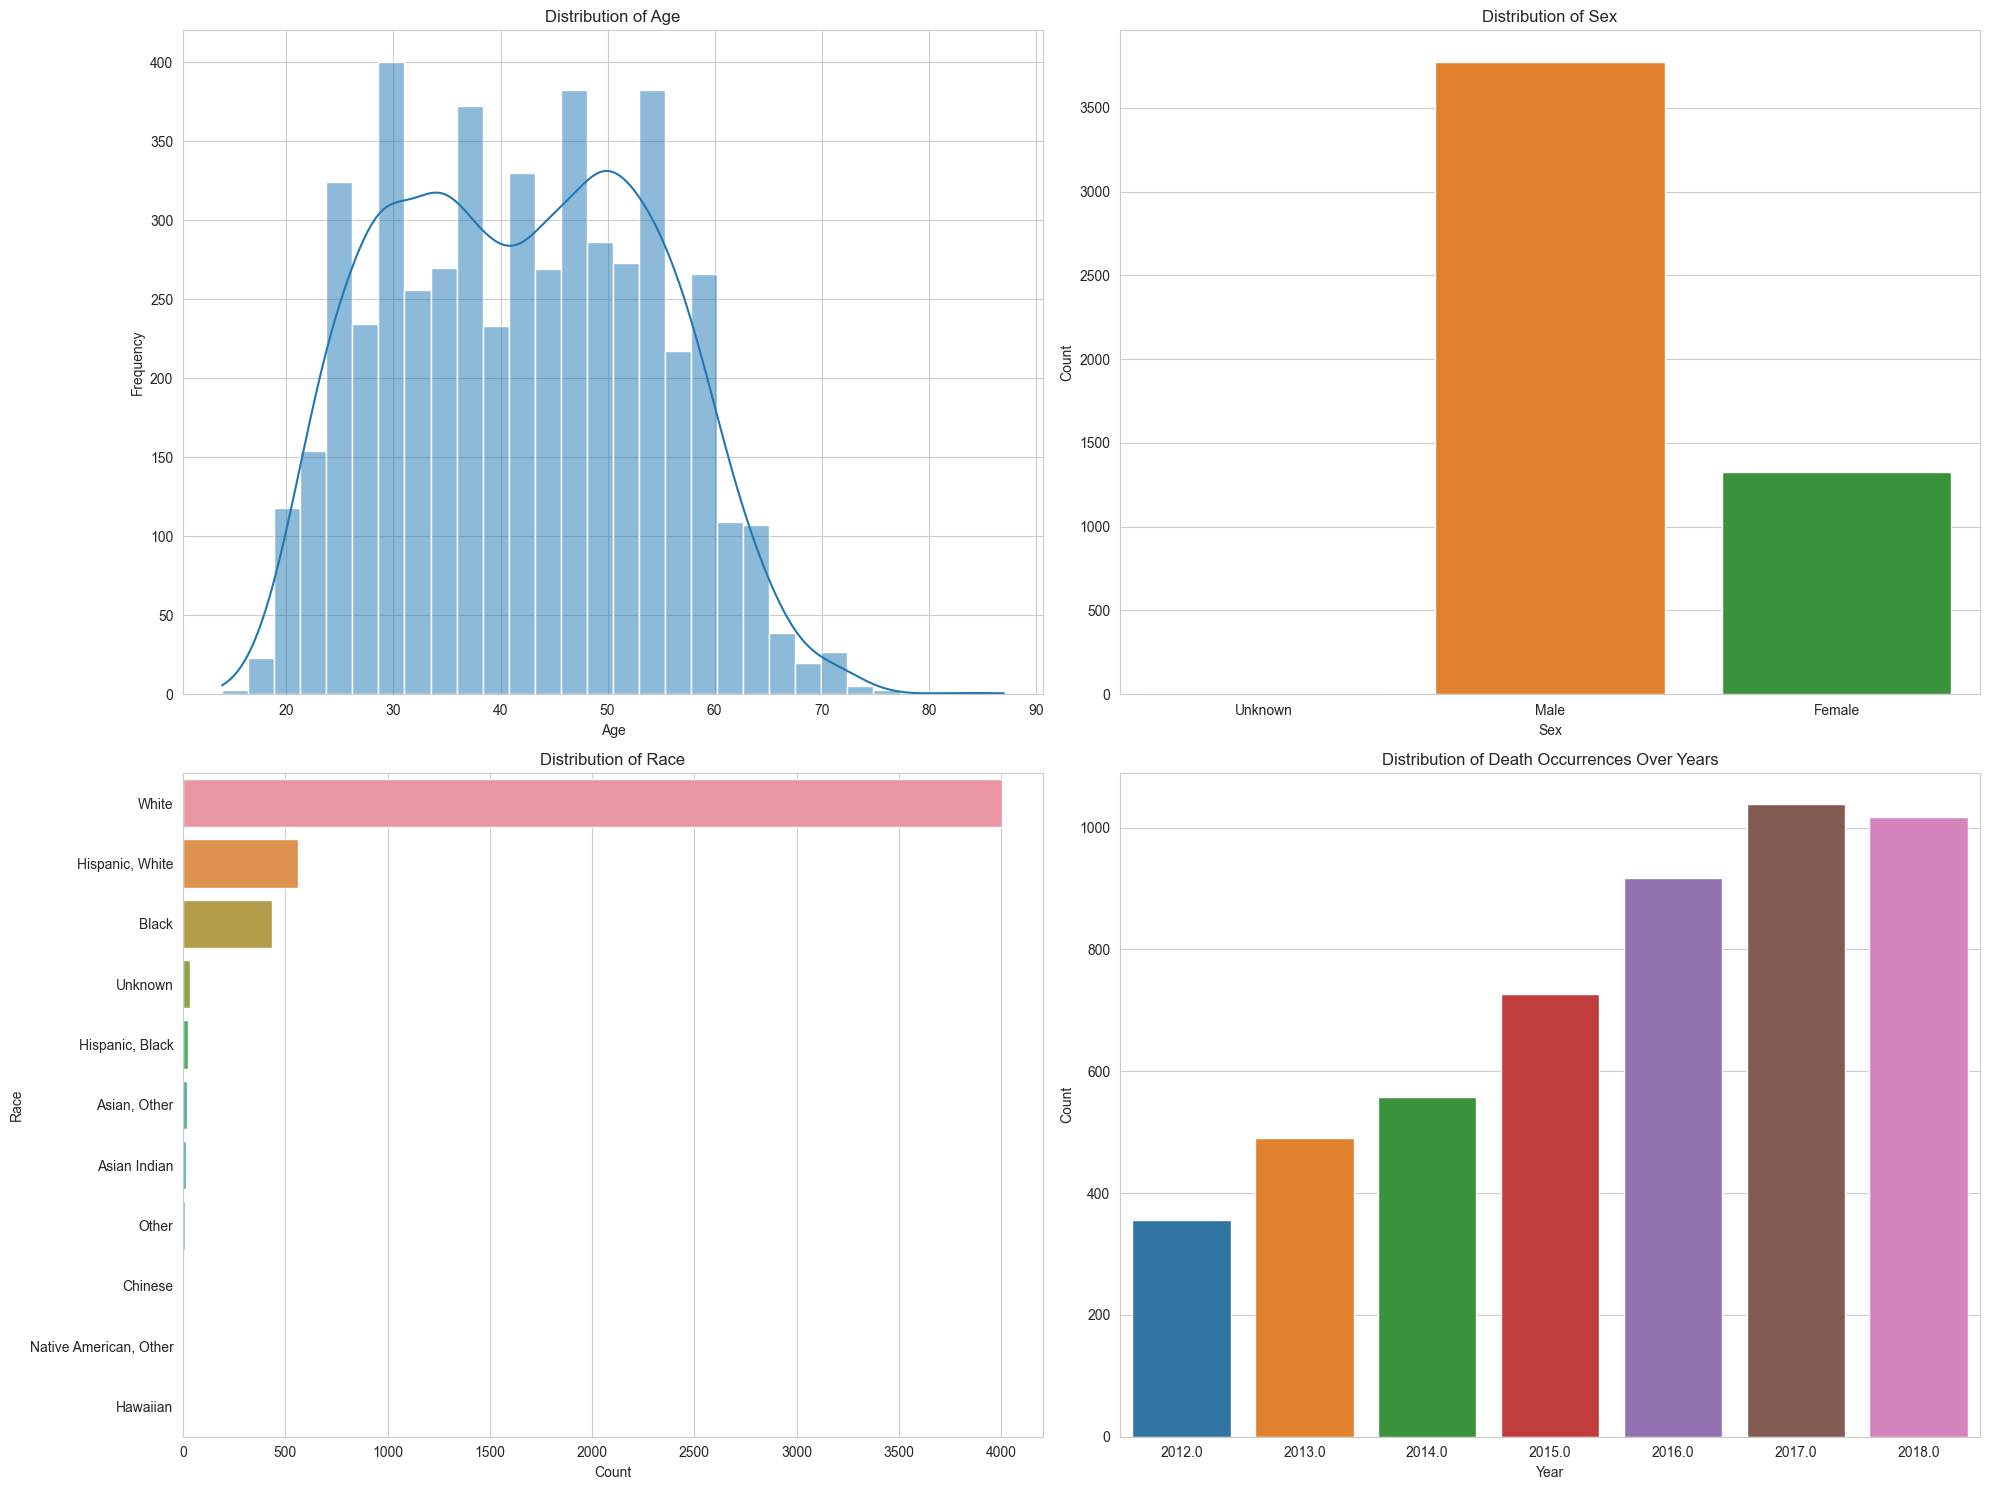

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Initializing the figure
plt.figure(figsize=(20, 15))

# Creating a list of axes objects for the subplots
ax = [plt.subplot(2, 2, i+1) for i in range(4)]

# Plotting the distribution of Age
sns.histplot(drug_deaths['Age'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Plotting the distribution of Sex
sns.countplot(data=drug_deaths, x='Sex', ax=ax[1])
ax[1].set_title('Distribution of Sex')
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Count')

# Plotting the distribution of Race
sns.countplot(data=drug_deaths, y='Race', order = drug_deaths['Race'].value_counts().index, ax=ax[2])
ax[2].set_title('Distribution of Race')
ax[2].set_xlabel('Count')
ax[2].set_ylabel('Race')

# Plotting the distribution of Death Occurrences Over Years
sns.countplot(data=drug_deaths, x='Year', ax=ax[3])
ax[3].set_title('Distribution of Death Occurrences Over Years')
ax[3].set_xlabel('Year')
ax[3].set_ylabel('Count')

# Adjusting the layout
plt.tight_layout()
plt.show()


Observations:
Age Distribution:
The age distribution shows a somewhat right-skewed pattern. Most of the drug overdose deaths occur in individuals aged between 30 and 40 years old. There's also a significant number of cases in the age range of 40 to 60.

Sex Distribution:
Males have a significantly higher number of drug overdose deaths compared to females.

Race Distribution:
The majority of drug overdose deaths are among White individuals, followed by a smaller number among Black and Hispanic individuals. The other racial categories have significantly fewer occurrences.

Death Occurrences Over Years:
There's a noticeable increase in drug overdose deaths from 2012 to 2017, with a slight drop in 2018. This could indicate a concerning trend of rising drug overdose deaths over the years.


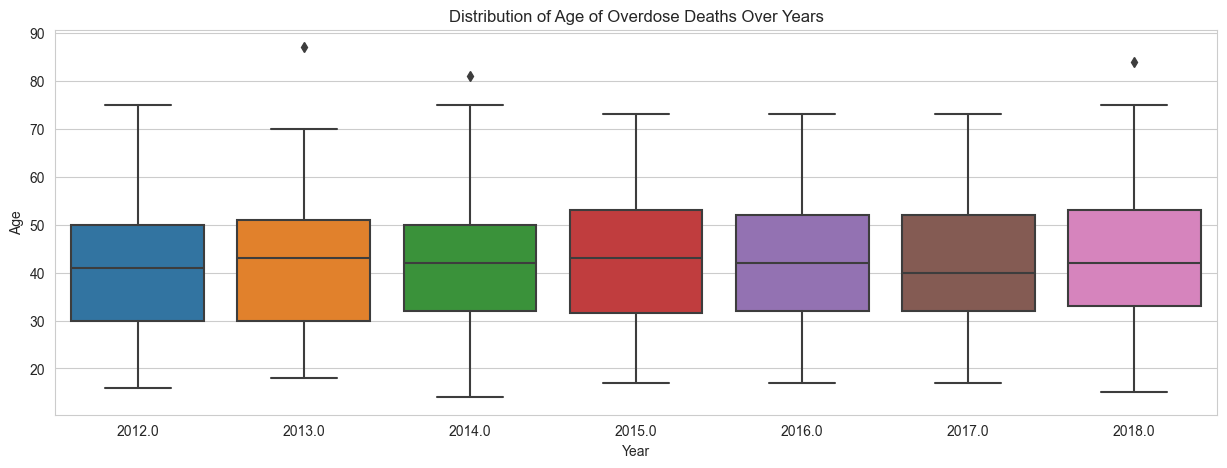

In [5]:
# Initializing the figure
plt.figure(figsize=(15, 5))

# Age vs. Year
sns.boxplot(data=drug_deaths, x='Year', y='Age')
plt.title('Distribution of Age of Overdose Deaths Over Years')
plt.xlabel('Year')
plt.ylabel('Age')

plt.show()


The boxplot illustrates the distribution of ages of overdose deaths over the years. The central line in each box represents the median age, while the top and bottom of each box represent the third (Q3) and first quartiles (Q1) respectively. The "whiskers" extend to 1.5 * IQR (inter-quartile range) above Q3 and below Q1, showcasing the range of the data.

Observations:
The median age of drug overdose deaths seems to remain relatively stable over the years, hovering around the mid-30s to early 40s.
The interquartile range also appears consistent over the years, indicating a steady age distribution of overdose deaths.
Next, we'll look at the trend of overdose deaths among different genders over the years.

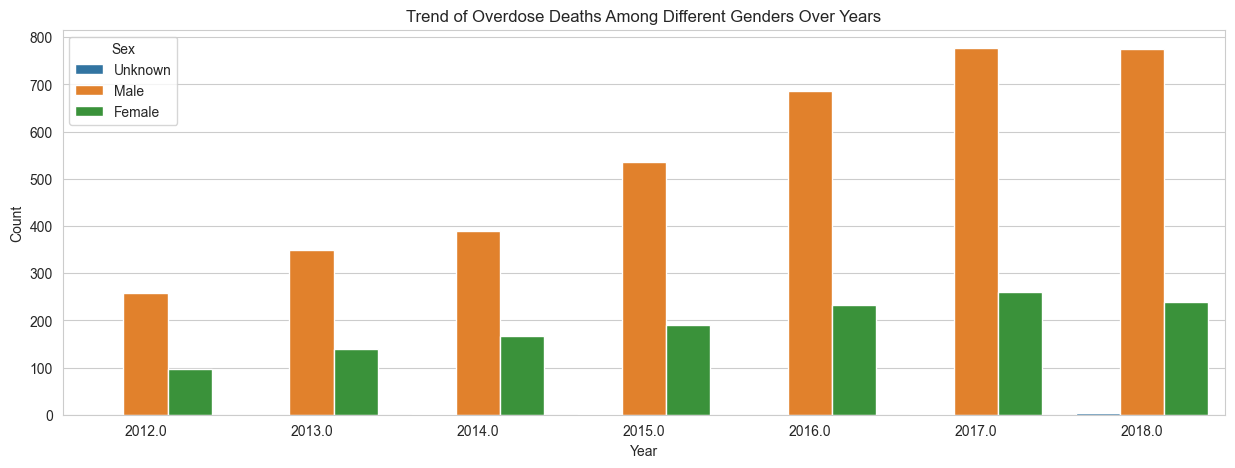

In [6]:
# Sex vs. Year
plt.figure(figsize=(15, 5))
sns.countplot(data=drug_deaths, x='Year', hue='Sex')
plt.title('Trend of Overdose Deaths Among Different Genders Over Years')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()


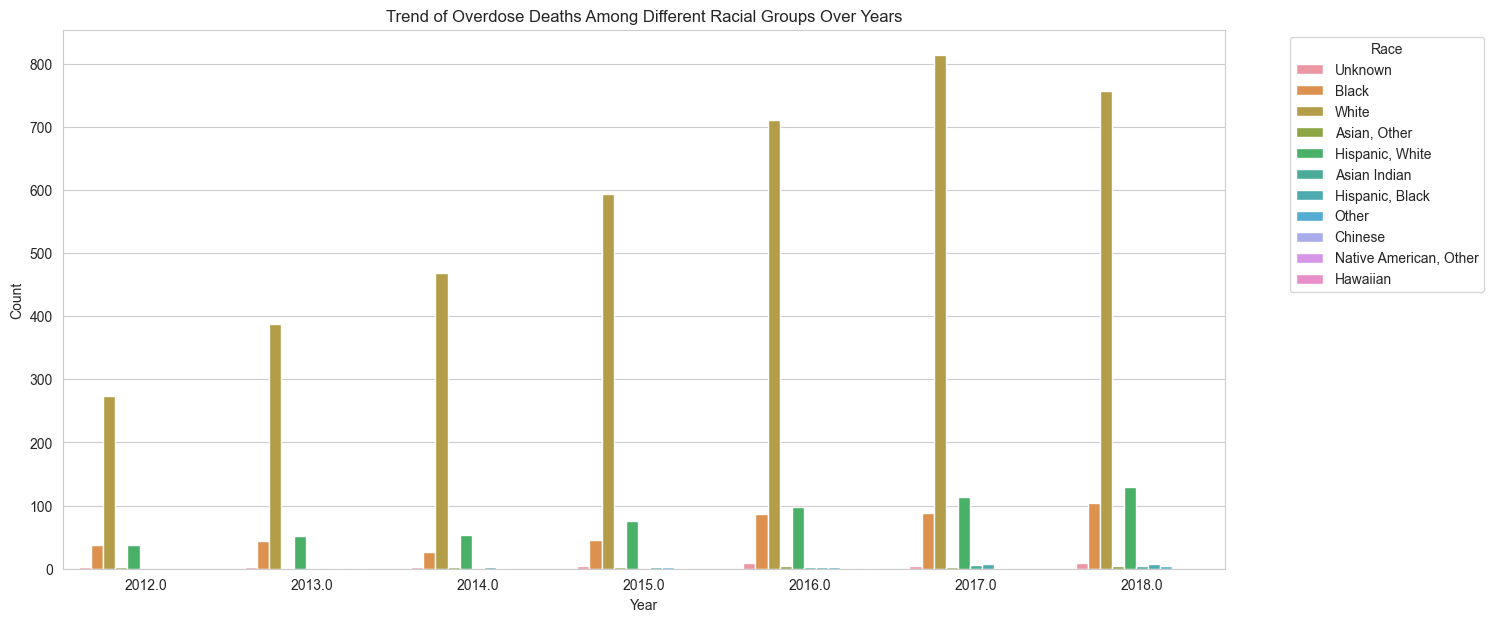

In [7]:
# Race vs. Year
plt.figure(figsize=(15, 7))
sns.countplot(data=drug_deaths, x='Year', hue='Race')
plt.title('Trend of Overdose Deaths Among Different Racial Groups Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [9]:
# Selecting the columns related to substances
substance_cols = drug_deaths.columns[20:38]

# Creating a correlation matrix
correlation_matrix = drug_deaths[substance_cols].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Substances Involved in Overdoses')
plt.show()


ValueError: could not convert string to float: '1ES'

In [10]:
# Checking the unique values in each of the substance-related columns to identify any non-numeric values
unique_values_in_substance_cols = {col: drug_deaths[col].unique() for col in substance_cols}
unique_values_in_substance_cols


{'Heroin': array([0, 1]),
 'Cocaine': array([0, 1]),
 'Fentanyl': array([ 1.,  0., nan]),
 'Fentanyl_Analogue': array([0., 1.]),
 'Oxycodone': array([0, 1]),
 'Oxymorphone': array([0, 1]),
 'Ethanol': array([0, 1]),
 'Hydrocodone': array([1, 0]),
 'Benzodiazepine': array([1, 0]),
 'Methadone': array([0, 1]),
 'Amphet': array([0, 1]),
 'Tramad': array([0, 1]),
 'Morphine_NotHeroin': array(['0', '1', '1ES', 'STOLE MEDS', 'NO RX BUT STRAWS', 'PCP NEG'],
       dtype=object),
 'Hydromorphone': array([0, 1]),
 'Other': array([nan, 'Bupren', 'lsd, hydromorph', 'opiate', 'BUPREN', 'HYDROMORPH',
        'OTHERS', 'pcp', 'PCP', 'ketamine', 'meperidine', 'opiate screen',
        'MDMA', 'COD', 'PAROX', 'carfentanil', 'hydromorph', 'DUSTER',
        'DIPHENHYDRAMINE', 'Buprenor', 'HYDRO MORPH', 'BUPRE', 'MORPHINE',
        'morphine', 'MORPH', 'hyd-morph', 'U47700', 'DOX, DIPHEN',
        'opiates', 'Buprenor, carfentanil', 'mdma', 'SERT', 'TAPENTADOL',
        '4-anpp', 'methoxyPCP', 'N-ETHYL-PE

To proceed with the correlation analysis, we'll need to handle these non-numeric entries. One straightforward way to handle them would be to convert the non-numeric entries to NaN values, and convert the columns to a numeric data type.

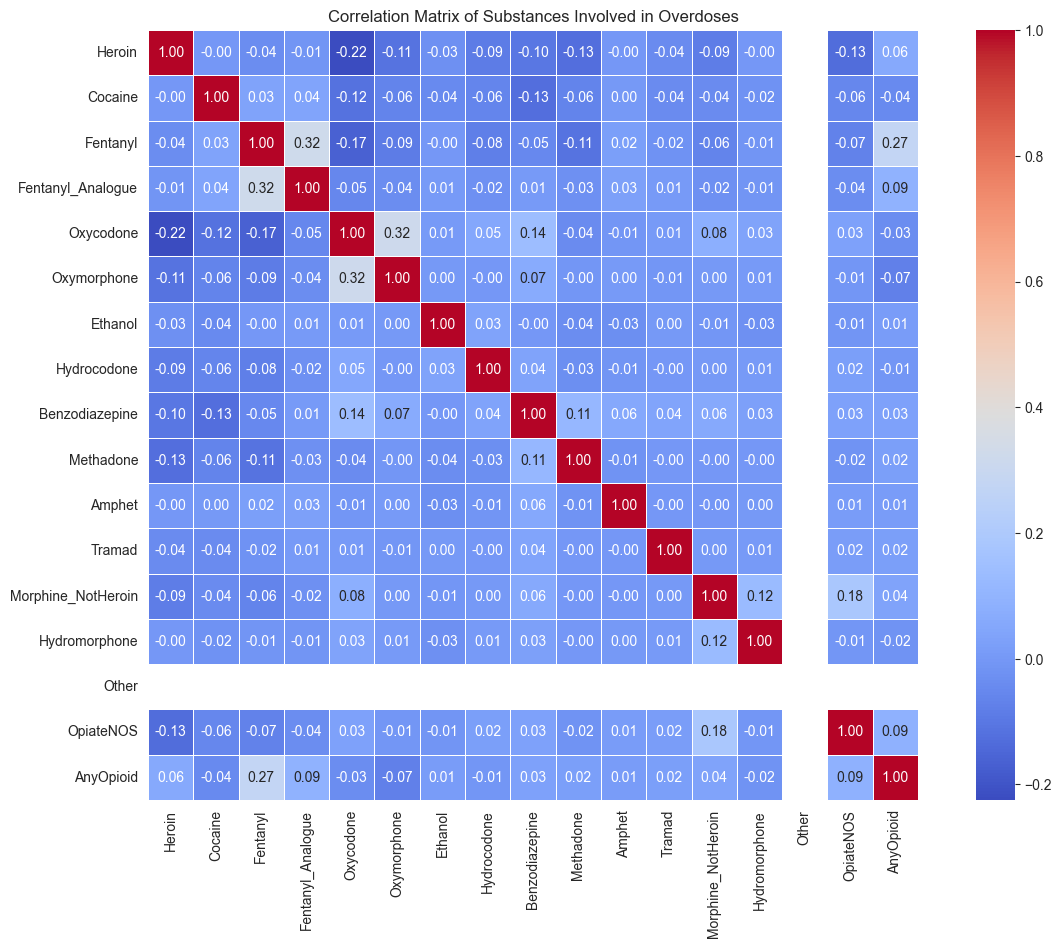

In [12]:
# Updating the substance_cols selection to exclude the 'MannerofDeath' column
substance_cols_updated = substance_cols[:-1]

# Recreating the correlation matrix with the updated substance_cols selection
correlation_matrix_updated = drug_deaths[substance_cols_updated].corr()

# Visualizing the updated correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_updated, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Substances Involved in Overdoses')
plt.show()


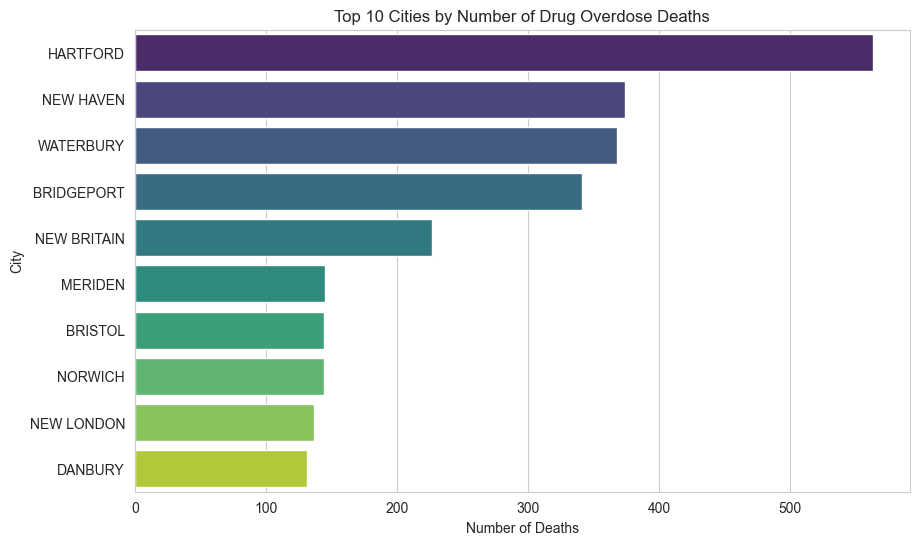

In [13]:
# Getting the count of overdose deaths for each death city
death_city_counts = drug_deaths['DeathCity'].value_counts().head(10)  # Top 10 cities

# Plotting the geographic distribution of drug overdose deaths
plt.figure(figsize=(10, 6))
sns.barplot(x=death_city_counts.values, y=death_city_counts.index, palette='viridis')
plt.title('Top 10 Cities by Number of Drug Overdose Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('City')
plt.show()


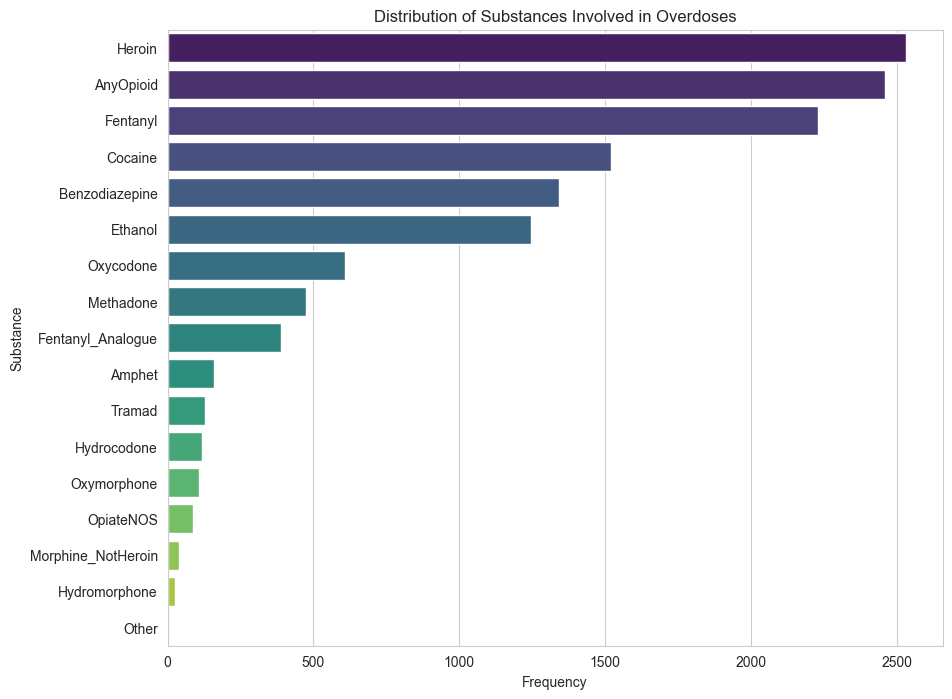

In [14]:
# Calculating the frequency of occurrences of different substances
substance_frequencies = drug_deaths[substance_cols_updated].sum()

# Sorting the substances by frequency
sorted_substances = substance_frequencies.sort_values(ascending=False)

# Plotting the distribution of substances
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_substances.values, y=sorted_substances.index, palette='viridis')
plt.title('Distribution of Substances Involved in Overdoses')
plt.xlabel('Frequency')
plt.ylabel('Substance')
plt.show()


Heroin, Fentanyl, and Cocaine are the most frequently occurring substances in drug overdose deaths, with Heroin being the most common.
Other substances like Ethanol, Benzodiazepine, and Oxycodone also have a significant number of occurrences, but less compared to the top three.
Some substances are rarely involved in overdoses, such as Hydrocodone, Methadone, Tramadol, and others.

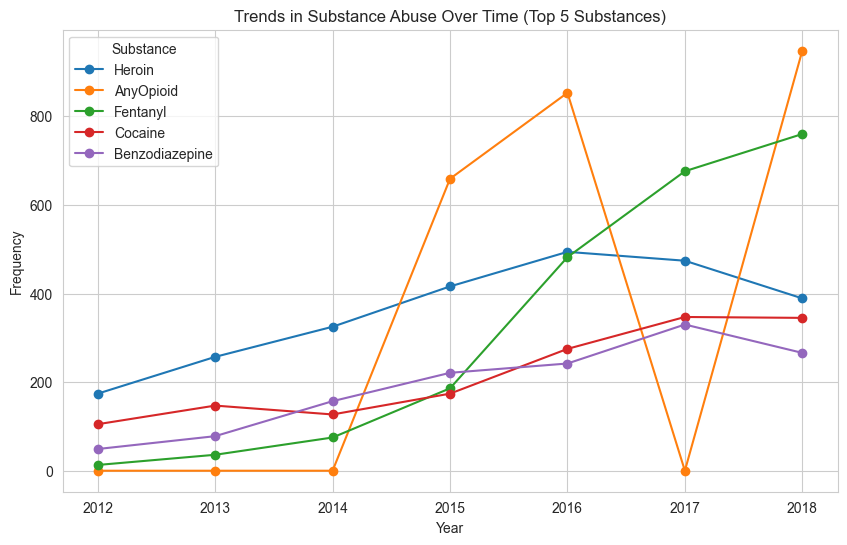

In [15]:
# Selecting the top 5 most common substances
top_substances = sorted_substances.head(5).index

# Grouping the data by year and summing the occurrences of each substance
yearly_substance_trend = drug_deaths.groupby('Year')[top_substances].sum()

# Plotting the trends in substance abuse over time
yearly_substance_trend.plot(figsize=(10, 6), marker='o')
plt.title('Trends in Substance Abuse Over Time (Top 5 Substances)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Substance')
plt.grid(True)
plt.show()


Heroin:
The occurrences of heroin in overdose deaths increased steadily from 2012 to 2016, peaked in 2016, and then started to decline.

Fentanyl:
The occurrences of fentanyl sharply increased from 2014 to 2017, surpassing heroin in 2017. This rapid increase in fentanyl involvement is a concerning trend.

Cocaine:
The occurrences of cocaine have been relatively steady, with a slight increase from 2015 to 2017.

Ethanol and Benzodiazepine:
These substances have relatively lower occurrences compared to heroin, fentanyl, and cocaine. However, there's a noticeable increase in ethanol occurrences from 2012 to 2015, and benzodiazepine occurrences have been fairly steady over the years.

We will delve deeper into the demographic aspects of the drug overdose data to understand how different demographic factors might be associated with drug overdoses.

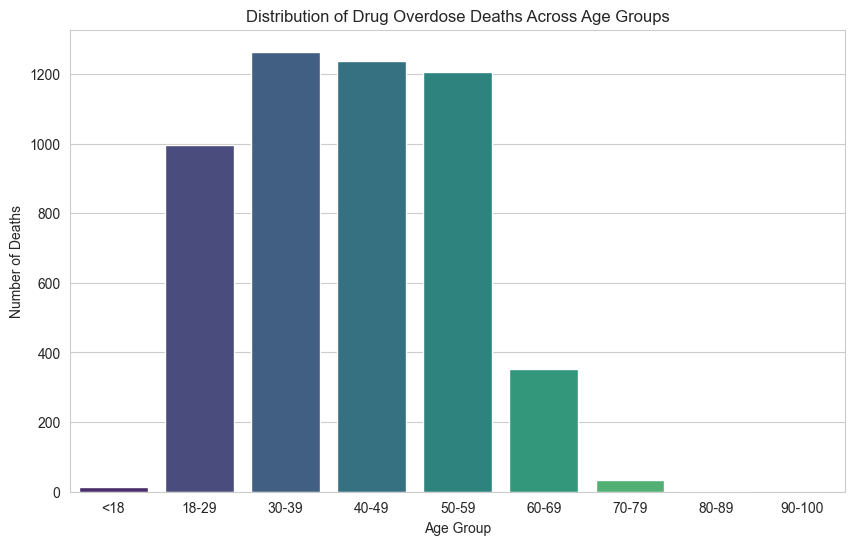

In [16]:
# Defining age groups
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
drug_deaths['AgeGroup'] = pd.cut(drug_deaths['Age'], bins=bins, labels=labels, right=False)

# Getting the count of overdose deaths for each age group
age_group_counts = drug_deaths['AgeGroup'].value_counts().sort_index()

# Plotting the distribution of drug overdose deaths across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Distribution of Drug Overdose Deaths Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.show()


Observations:
The age group 30-39 has the highest number of drug overdose deaths, followed closely by the 40-49 and 50-59 age groups.
There's a significant drop in the number of overdose deaths in the 60-69 age group and further decline in older age groups.
The age groups <18 and 18-29 have comparatively lower occurrences of drug overdose deaths.

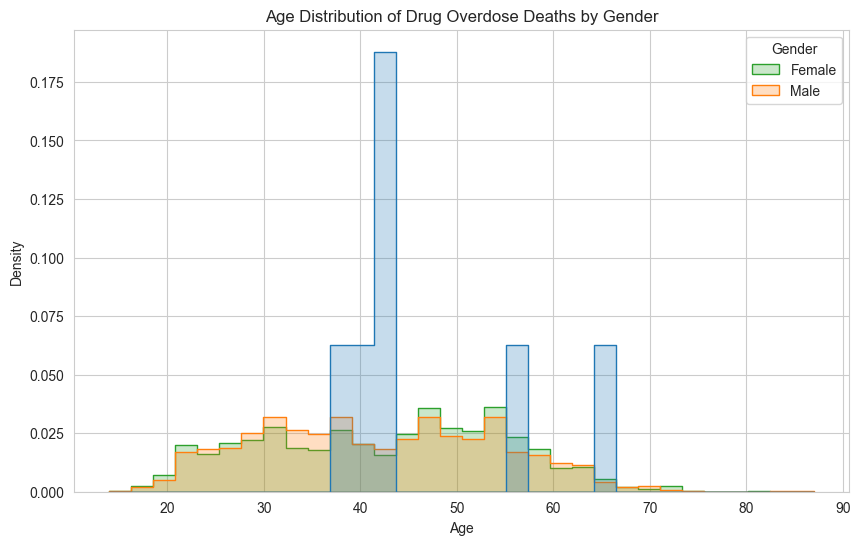

In [17]:
# Plotting the distribution of ages for both genders
plt.figure(figsize=(10, 6))
sns.histplot(data=drug_deaths, x='Age', hue='Sex', element='step', stat='density', common_norm=False)
plt.title('Age Distribution of Drug Overdose Deaths by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


For both genders, the density of drug overdose deaths peaks around the age range of 30-40.
Males have a higher density of drug overdose deaths across almost all age ranges, especially pronounced in the 30-50 age range.
Females have a slightly earlier peak (around age 30) compared to males (around age 40).


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


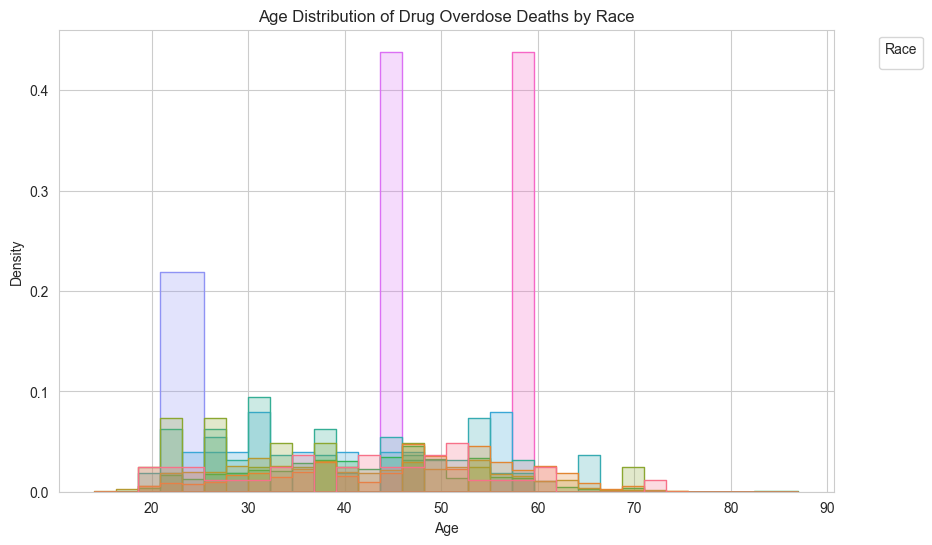

In [18]:
# Plotting the distribution of ages for different racial groups
plt.figure(figsize=(10, 6))
sns.histplot(data=drug_deaths, x='Age', hue='Race', element='step', stat='density', common_norm=False)
plt.title('Age Distribution of Drug Overdose Deaths by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


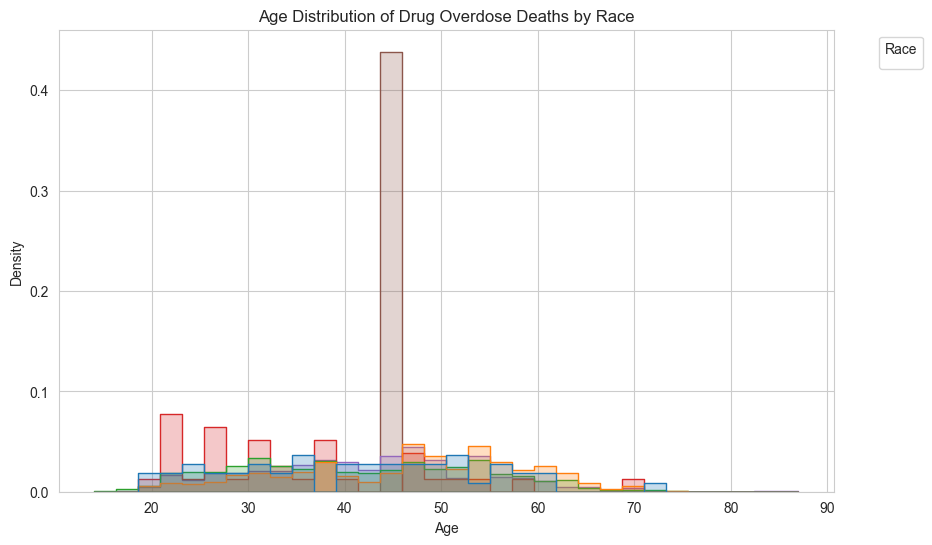

In [19]:
# Simplifying racial categories for visualization
race_mapping = {
    'White': 'White',
    'Hispanic, White': 'Hispanic',
    'Black': 'Black',
    'Hispanic, Black': 'Hispanic',
    'Asian, Other': 'Asian',
    'Asian Indian': 'Asian',
    'Chinese': 'Asian',
    'Native American, Other': 'Native American',
    'Unknown': 'Other/Unknown',
    'Other': 'Other/Unknown',
    'Hawaiian': 'Other/Unknown'
}

drug_deaths['SimplifiedRace'] = drug_deaths['Race'].map(race_mapping)

# Re-plotting the distribution of ages for simplified racial groups
plt.figure(figsize=(10, 6))
sns.histplot(data=drug_deaths, x='Age', hue='SimplifiedRace', element='step', stat='density', common_norm=False)
plt.title('Age Distribution of Drug Overdose Deaths by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [20]:
# Checking the unique values and their counts in the 'SimplifiedRace' column
simplified_race_counts = drug_deaths['SimplifiedRace'].value_counts()
simplified_race_counts


SimplifiedRace
White              4004
Hispanic            585
Black               433
Other/Unknown        48
Asian                34
Native American       1
Name: count, dtype: int64

/var/folders/xp/7gn92qw92_z23w6s9k9sxtfm0000gq/T/ipykernel_59453/2106922685.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, x='Age', label=race, fill=True)


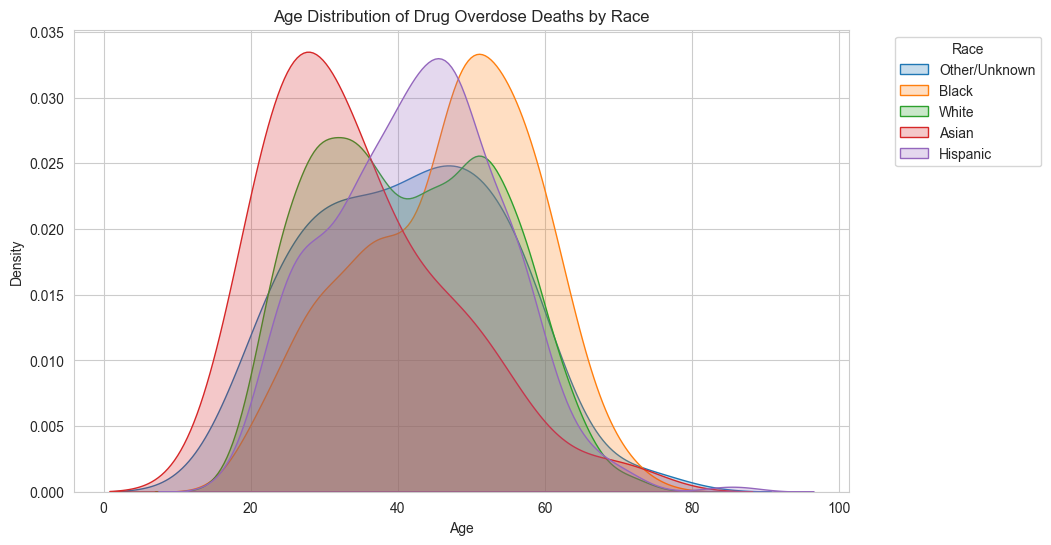

In [21]:
# Re-plotting the distribution of ages for simplified racial groups using a different approach
plt.figure(figsize=(10, 6))

# Plotting each racial group separately to ensure legend labels are correct
for race in drug_deaths['SimplifiedRace'].unique():
    subset = drug_deaths[drug_deaths['SimplifiedRace'] == race]
    sns.kdeplot(data=subset, x='Age', label=race, fill=True)

plt.title('Age Distribution of Drug Overdose Deaths by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The highest density of drug overdose deaths among White individuals occurs around age 30-40.
Black individuals show a slightly later peak around age 40-50.
Hispanic individuals also have a peak around age 30-40, similar to White individuals.
Asian individuals have a lower density across all age groups with a small peak around age 40-50.
The Native American category has a very low representation in the dataset, as seen from both the plot and the data.
The Other/Unknown category has a relatively low density across all age groups.


Now, let's look at how these demographic distributions have evolved over the years.

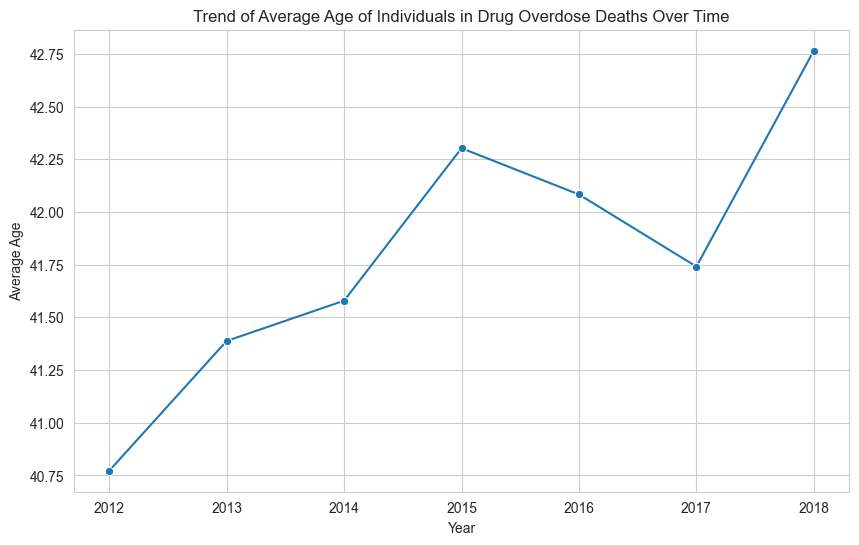

In [22]:
# Calculating the average age of individuals involved in drug overdose deaths for each year
average_age_trend = drug_deaths.groupby('Year')['Age'].mean()

# Plotting the trend of average age over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_age_trend.index, y=average_age_trend.values, marker='o')
plt.title('Trend of Average Age of Individuals in Drug Overdose Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.grid(True)
plt.show()


The average age of individuals in drug overdose deaths has remained relatively stable around 42 years old from 2012 to 2018.
There's a slight increase in the average age around 2013 and a slight decrease around 2017, but these variations are minor.

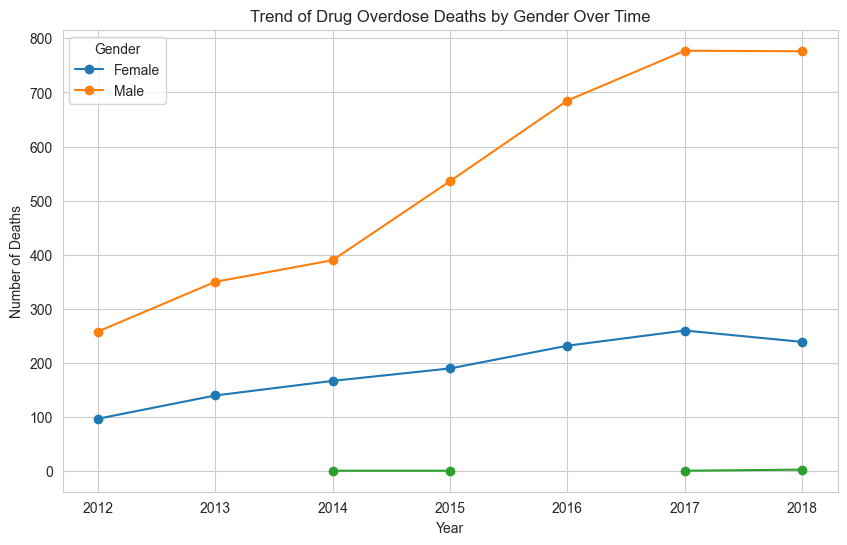

In [23]:
# Calculating the count of drug overdose deaths for each gender per year
gender_trend = drug_deaths.groupby(['Year', 'Sex']).size().unstack()

# Plotting the gender trend over time
gender_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Trend of Drug Overdose Deaths by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.grid(True)
plt.show()


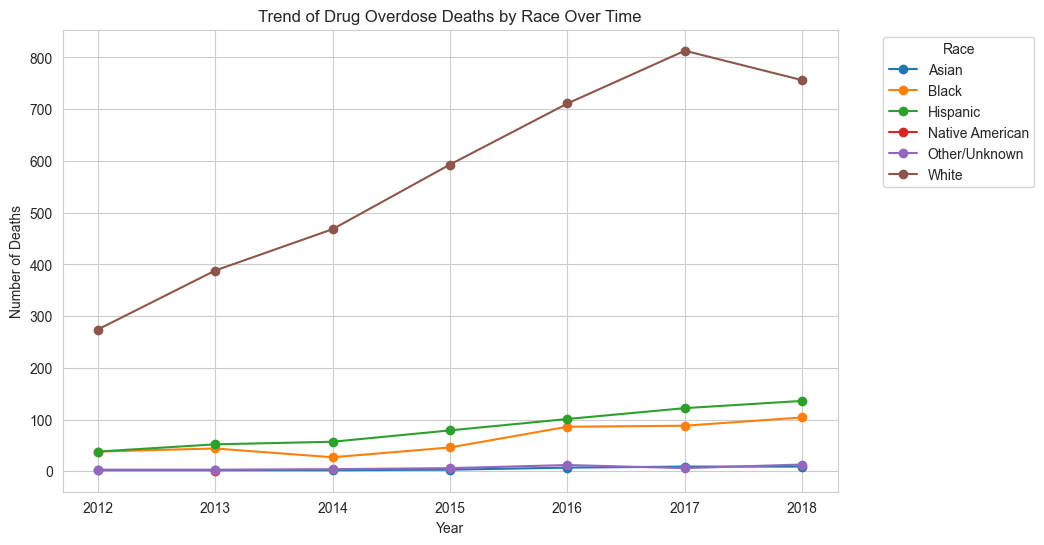

In [24]:
# Calculating the count of drug overdose deaths for each simplified racial group per year
race_trend = drug_deaths.groupby(['Year', 'SimplifiedRace']).size().unstack()

# Plotting the race trend over time
race_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Trend of Drug Overdose Deaths by Race Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


The White racial group has the highest number of drug overdose deaths across all years, with a noticeable increase from 2012 to 2017, peaking in 2017 before a slight decline in 2018.
The Black and Hispanic racial groups also show an increase in drug overdose deaths over the years, although the numbers are significantly lower compared to the White racial group.
The Asian, Native American, and Other/Unknown categories have relatively low counts of drug overdose deaths across all years.
The overall trend shows a rising concern of drug overdose deaths across all racial groups over the years, with a slight improvement in 2018.